In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminación de duplicados - ALL

In [5]:
basepath = "/home/jonathan/tesis/11avo_avance/trayectoNnormalidad.csv"
data = pd.read_csv(basepath, dtype={"fecha": str,
                                    "origen": str,
                                    "destino": str}, sep=',') 
df = data[['fecha','periodo','origen','destino','distancia','viajes']]

# verificamos ceros

In [11]:
ceros = df.loc[df['viajes']==0.0]
ceros2 = df.query('viajes < 1.5')
print(ceros.head())
print(ceros2.head())

Empty DataFrame
Columns: [fecha, periodo, origen, destino, distancia, viajes]
Index: []
         fecha  periodo   origen  destino distancia  viajes
3725  20200703        8  2807905  2807901   002-005   1.159
6545  20200713       11  2807905  2807901   002-005   1.079
8734  20200721        3  2807905  2807901   005-010   1.128
8932  20200721        3  2807905  2807901   002-005   1.252
8933  20200721        3  2807905  2807901   005-010   1.128


# Graficamos duplicados

/tmp/ipykernel_4760/2968490780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'] = pd.to_datetime(df['fecha'], format='%Y%m%d')
/tmp/ipykernel_4760/2968490780.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicados['num_duplicados'] = duplicados.groupby(['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'])['viajes'].transform('count')


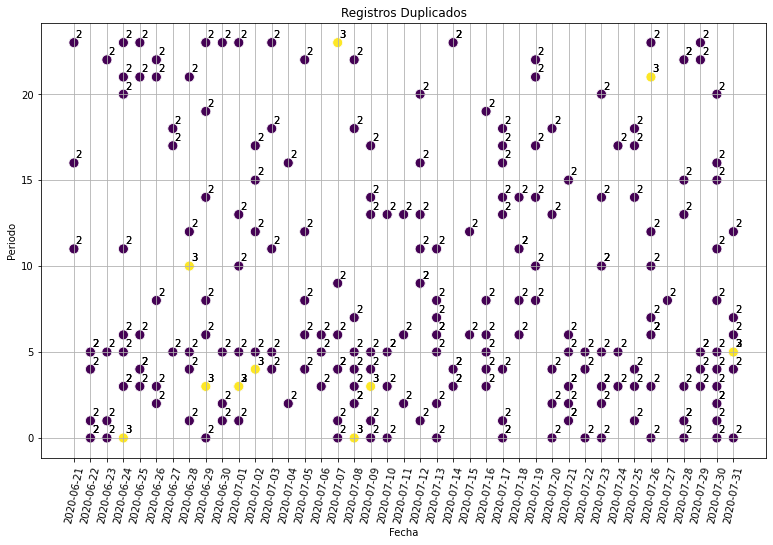

In [17]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y%m%d')

# Encontrar registros duplicados y contar el número de duplicados en cada grupo
duplicados = df[df.duplicated(subset=['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'], keep=False)]
duplicados['num_duplicados'] = duplicados.groupby(['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'])['viajes'].transform('count')

# Graficar los puntos de duplicados con el número de duplicados como etiquetas al lado de los puntos
plt.figure(figsize=(13, 8))
sns.scatterplot(x='fecha', y='periodo', hue='num_duplicados', size='num_duplicados', data=duplicados, palette='viridis', legend='full', sizes=(100, 100))

# Anotar los puntos con el número de duplicados al lado
for index, row in duplicados.iterrows():
    plt.annotate(str(row['num_duplicados']), (row['fecha'], row['periodo']), textcoords="offset points", xytext=(5,5), ha='center')

plt.grid(True)    
plt.title('Registros Duplicados')
plt.xlabel('Fecha')
plt.ylabel('Periodo')
plt.legend().set_visible(False)
unique_dates = duplicados['fecha'].unique()
plt.xticks(ticks=unique_dates, labels=[pd.to_datetime(date).strftime('%Y-%m-%d') for date in unique_dates], rotation=78)
plt.show()

# Eliminación de duplicados - 002-005

In [4]:
basepath = "/home/jonathan/tesis/11avo_avance/trayectoNnormalidad.csv"
data = pd.read_csv(basepath, dtype={"fecha": str,
                                    "origen": str,
                                    "destino": str}, sep=',') 
df = data[['fecha','periodo','origen','destino','distancia','viajes']]

df_dist1 = df.loc[df['distancia'] == '002-005'] 
df_dist1['fecha'] = pd.to_datetime(df_dist1['fecha'], format='%Y%m%d')

/tmp/ipykernel_4760/1109698795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist1['fecha'] = pd.to_datetime(df_dist1['fecha'], format='%Y%m%d')


/tmp/ipykernel_4760/2057518890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicados['num_duplicados'] = duplicados.groupby(['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'])['viajes'].transform('count')


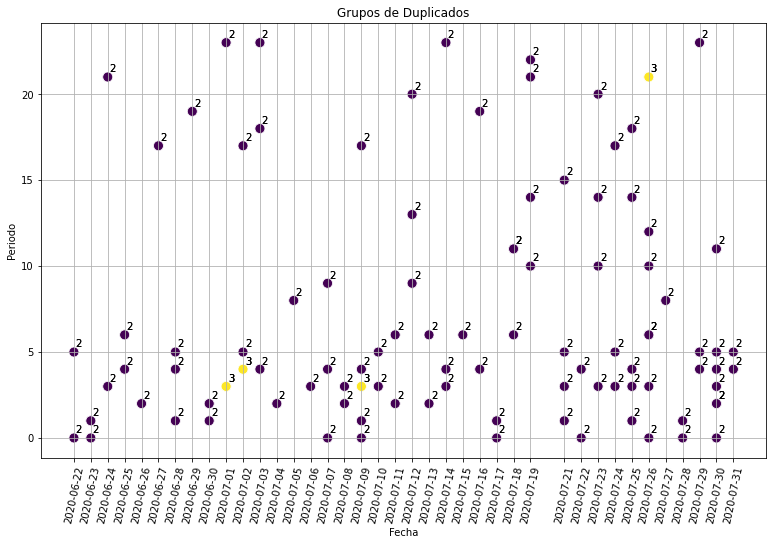

In [5]:
# Encontrar registros duplicados y contar el número de duplicados en cada grupo
duplicados = df_dist1[df_dist1.duplicated(subset=['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'], keep=False)]
duplicados['num_duplicados'] = duplicados.groupby(['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'])['viajes'].transform('count')

# Graficar los puntos de duplicados con el número de duplicados como etiquetas al lado de los puntos
plt.figure(figsize=(13, 8))
sns.scatterplot(x='fecha', y='periodo', hue='num_duplicados', size='num_duplicados', data=duplicados, palette='viridis', legend='full', sizes=(100, 100))

# Anotar los puntos con el número de duplicados al lado
for index, row in duplicados.iterrows():
    plt.annotate(str(row['num_duplicados']), (row['fecha'], row['periodo']), textcoords="offset points", xytext=(5,5), ha='center')

plt.grid(True)
plt.title('Grupos de Duplicados')
plt.xlabel('Fecha')
plt.ylabel('Periodo')
plt.legend().set_visible(False)

unique_dates = duplicados['fecha'].unique()
plt.xticks(ticks=unique_dates, labels=[pd.to_datetime(date).strftime('%Y-%m-%d') for date in unique_dates], rotation=78)

plt.show()

# Eliminación de duplicados - 005-010

In [6]:
basepath = "/home/jonathan/tesis/11avo_avance/trayectoNnormalidad.csv"
data = pd.read_csv(basepath, dtype={"fecha": str,
                                    "origen": str,
                                    "destino": str}, sep=',') 
df = data[['fecha','periodo','origen','destino','distancia','viajes']]

df_dist2 = df.loc[df['distancia'] == '005-010'] 
df_dist2['fecha'] = pd.to_datetime(df_dist2['fecha'], format='%Y%m%d')

/tmp/ipykernel_4760/1952818659.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist2['fecha'] = pd.to_datetime(df_dist2['fecha'], format='%Y%m%d')


/tmp/ipykernel_4760/3290792773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicados['num_duplicados'] = duplicados.groupby(['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'])['viajes'].transform('count')


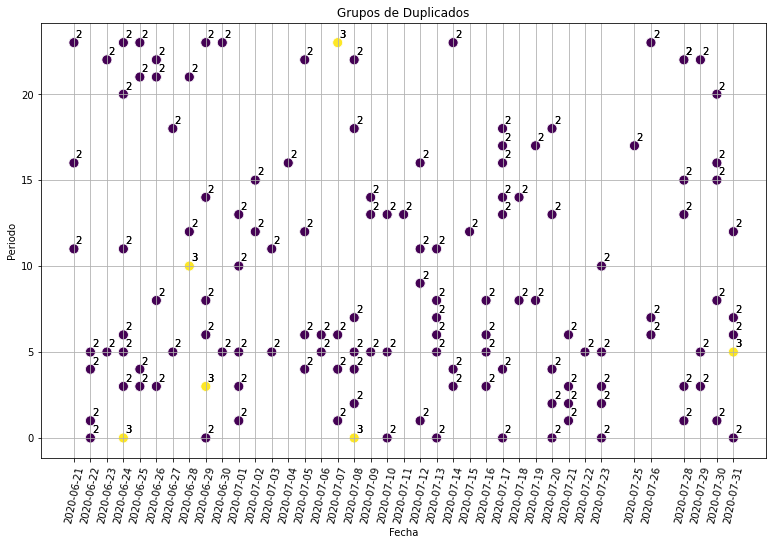

In [7]:
# Encontrar registros duplicados y contar el número de duplicados en cada grupo
duplicados = df_dist2[df_dist2.duplicated(subset=['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'], keep=False)]
# duplicados['num_duplicados'] = duplicados.duplicated(subset=['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'], keep=False).groupby(duplicados['fecha']).transform('sum')
duplicados['num_duplicados'] = duplicados.groupby(['fecha', 'periodo', 'origen', 'destino', 'distancia', 'viajes'])['viajes'].transform('count')


# Graficar los puntos de duplicados con el número de duplicados como etiquetas al lado de los puntos
plt.figure(figsize=(13, 8))
sns.scatterplot(x='fecha', y='periodo', hue='num_duplicados', size='num_duplicados', data=duplicados, palette='viridis', legend='full', sizes=(100, 100))

# Anotar los puntos con el número de duplicados al lado
for index, row in duplicados.iterrows():
    plt.annotate(str(row['num_duplicados']), (row['fecha'], row['periodo']), textcoords="offset points", xytext=(5,5), ha='center')

plt.grid(True)
plt.title('Grupos de Duplicados')
plt.xlabel('Fecha')
plt.ylabel('Periodo')
plt.legend().set_visible(False)

unique_dates = duplicados['fecha'].unique()
plt.xticks(ticks=unique_dates, labels=[pd.to_datetime(date).strftime('%Y-%m-%d') for date in unique_dates], rotation=78)
plt.show()

# Verificamos gráficas

In [26]:
basepath = "/home/jonathan/tesis/11avo_avance/trayectoNnormalidad.csv"
data = pd.read_csv(basepath, dtype={"fecha": str,
                                    "origen": str,
                                    "destino": str}, sep=',') 
df = data[['fecha','periodo','origen','destino','distancia','viajes']]

df = df.loc[df['fecha']=='20200624']
df = df.loc[df['distancia']=='002-005']
df = df.loc[df['periodo']==20]

In [27]:
df.head(60)

,fecha,periodo,origen,destino,distancia,viajes
822,20200624,20,2807905,2807901,002-005,79.545
851,20200624,20,2807905,2807901,002-005,5.303
887,20200624,20,2807905,2807901,002-005,108.463
900,20200624,20,2807905,2807901,002-005,6.407
917,20200624,20,2807905,2807901,002-005,6.350
956,20200624,20,2807905,2807901,002-005,128.042
985,20200624,20,2807905,2807901,002-005,5.838
989,20200624,20,2807905,2807901,002-005,11.257
1019,20200624,20,2807905,2807901,002-005,5.853
1052,20200624,20,2807905,2807901,002-005,23.579
